In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from keras.models import Sequential #Sequential는 층을 순서대로 쌓아주는 클래스
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

import missingno as msno

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

Using TensorFlow backend.


In [2]:
path = '/Users/hankiho/Desktop/네이버_과제/DSC2019_예선_데이터/'

In [3]:
st_data_exchange = pd.read_csv(path + 'st_data_exchange.tsv', delimiter='\t', header=0)

In [18]:
dt = st_data_exchange[(st_data_exchange['itemname2'] == '일본JPY (100엔)') |
                (st_data_exchange['itemname2'] == '홍콩HKD') |
                (st_data_exchange['itemname2'] == '태국THB') |
                (st_data_exchange['itemname2'] == '대만TWD') |
                (st_data_exchange['itemname2'] == '필리핀PHP') |
                (st_data_exchange['itemname2'] == '베트남VND 100')]
dt = dt[['date', 'cash_buying_val', 'itemname2']]
dt_exchange = dt.pivot(index = 'date',
                       columns = 'itemname2',
                       values = 'cash_buying_val')
dt_exchange.head(6)

itemname2,대만TWD,베트남VND 100,일본JPY (100엔),태국THB,필리핀PHP,홍콩HKD
date,,,,,,
20150107,37.15,5.74,939.80,35.42,26.86,144.61
20150113,36.75,5.67,931.89,34.94,26.62,142.49
20150116,36.89,5.65,939.30,35.02,26.54,141.74
20150119,36.99,5.65,936.00,35.08,26.63,141.92
20150122,37.29,5.67,936.43,35.26,26.98,142.71
20150128,37.49,5.67,935.12,35.24,26.99,142.46


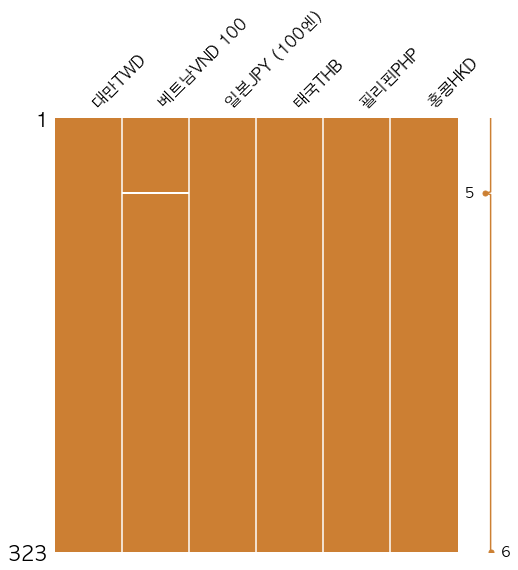

In [5]:
msno.matrix(dt_exchange.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))

In [6]:
def change(data, country):
    if data[country].isnull().sum() == 0:
        result = np.array(data[country])
    else:
        data = data[country].fillna(data[country].mean())
        result = np.array(dt_exchange[country])
# return을 사용해 볼 것

In [7]:
if dt_exchange['홍콩HKD'].isnull().sum() == 0:
    hongkong = np.array(dt_exchange['홍콩HKD'])
else:
    dt_exchange['홍콩HKD'] = dt_exchange['홍콩HKD'].fillna(dt_exchange['홍콩HKD'].median())
    hongkong = np.array(dt_exchange['홍콩HKD'])
hongkong

array([144.61, 142.49, 141.74, 141.92, 142.71, 142.46, 144.6 , 143.42,
       144.13, 145.66, 146.18, 144.62, 144.84, 144.69, 147.99, 147.99,
       148.05, 146.68, 145.31, 145.32, 143.6 , 143.94, 145.09, 143.24,
       141.94, 141.01, 142.25, 144.26, 142.97, 142.95, 143.68, 145.34,
       146.42, 146.4 , 147.68, 146.24, 147.12, 145.39, 147.28, 147.73,
       147.42, 149.1 , 148.68, 148.92, 151.01, 151.68, 153.49, 154.19,
       153.6 , 153.68, 155.4 , 155.45, 157.09, 158.08, 155.25, 155.82,
       157.59, 156.07, 155.61, 153.63, 156.53, 154.89, 152.26, 151.27,
       149.09, 147.85, 149.75, 148.9 , 149.17, 150.26, 152.49, 152.57,
       154.08, 151.84, 152.12, 152.39, 153.09, 154.95, 155.47, 156.  ,
       155.34, 154.79, 153.77, 157.89, 159.27, 158.9 , 158.5 , 158.41,
       157.58, 158.5 , 156.75, 157.51, 160.67, 161.76, 162.32, 162.16,
       158.47, 158.29, 157.73, 156.83, 152.44, 153.83, 153.29, 150.  ,
       152.51, 150.39, 150.96, 150.96, 149.22, 151.06, 149.67, 153.76,
      

In [8]:
if dt_exchange['대만TWD'].isnull().sum() == 0:
    taiwan = np.array(dt_exchange['대만TWD'])
else:
    dt_exchange['대만TWD'] = dt_exchange['대만TWD'].fillna(dt_exchange['대만TWD'].median())
    taiwan = np.array(dt_exchange['대만TWD'])
taiwan

array([37.15, 36.75, 36.89, 36.99, 37.29, 37.49, 37.56, 37.44, 37.51,
       37.88, 37.94, 37.75, 37.87, 37.76, 38.4 , 38.51, 38.62, 38.34,
       38.22, 38.15, 37.91, 37.84, 38.07, 37.72, 37.53, 37.87, 38.13,
       38.51, 38.51, 38.5 , 38.79, 38.96, 38.94, 38.93, 38.93, 38.84,
       39.07, 38.67, 39.11, 39.18, 39.16, 39.45, 39.33, 39.47, 39.81,
       39.91, 40.02, 39.98, 39.81, 39.84, 39.52, 39.42, 39.47, 39.53,
       39.58, 39.36, 39.59, 39.34, 39.23, 38.85, 39.05, 38.78, 38.49,
       38.18, 37.9 , 37.53, 37.85, 37.62, 37.73, 37.97, 38.21, 38.25,
       38.55, 38.26, 38.19, 38.31, 38.4 , 38.7 , 38.88, 38.97, 38.77,
       38.67, 38.42, 38.96, 39.08, 39.08, 38.97, 38.84, 38.64, 38.99,
       38.96, 39.35, 39.8 , 40.02, 40.2 , 40.08, 39.7 , 39.74, 39.45,
       39.29, 38.54, 38.75, 38.58, 38.3 , 38.61, 38.21, 38.34, 38.29,
       37.98, 38.35, 38.15, 38.82, 38.92, 39.29, 39.15, 39.24, 39.51,
       38.8 , 39.02, 39.11, 39.3 , 38.76, 38.94, 38.77, 38.55, 38.45,
       38.43, 38.48,

In [9]:
if dt_exchange['일본JPY (100엔)'].isnull().sum() == 0:
    japan = np.array(dt_exchange['일본JPY (100엔)'])
else:
    dt_exchange['일본JPY (100엔)'] = dt_exchange['일본JPY (100엔)'].fillna(dt_exchange['일본JPY (100엔)'].median())
    japan = np.array(dt_exchange['일본JPY (100엔)'])
japan

array([ 939.8 ,  931.89,  939.3 ,  936.  ,  936.43,  935.12,  952.83,
        945.34,  939.14,  942.13,  948.16,  937.92,  934.12,  934.19,
        943.68,  944.09,  947.82,  944.85,  948.24,  934.68,  925.73,
        925.21,  929.01,  928.38,  918.78,  916.03,  918.22,  929.58,
        925.04,  923.96,  919.18,  913.7 ,  909.72,  907.27,  911.1 ,
        914.94,  919.34,  909.14,  923.31,  929.05,  929.18,  940.19,
        941.28,  932.63,  942.29,  947.62,  960.05,  959.92,  956.77,
        951.97,  967.27,  967.4 ,  988.52, 1015.22,  997.22, 1005.1 ,
       1015.12, 1001.2 , 1001.41,  982.65, 1006.5 ,  997.08,  980.96,
        977.28,  967.37,  957.66,  967.02,  956.62,  954.83,  953.45,
        955.5 ,  959.41,  966.41,  958.43,  961.04,  958.16,  961.39,
        973.91,  986.03,  995.16,  981.41,  989.32,  987.66, 1029.86,
       1050.33, 1051.96, 1050.98, 1056.5 , 1035.31, 1019.44, 1042.21,
       1096.76, 1096.59, 1117.8 , 1115.27, 1114.87, 1079.66, 1080.15,
       1077.23, 1068

In [10]:
if dt_exchange['태국THB'].isnull().sum() == 0:
    taipei = np.array(dt_exchange['태국THB'])
else:
    dt_exchange['태국THB'] = dt_exchange['태국THB'].fillna(dt_exchange['태국THB'].median())
    taipei = np.array(dt_exchange['태국THB'])
taipei

array([35.42, 34.94, 35.02, 35.08, 35.26, 35.24, 35.73, 35.48, 35.59,
       35.9 , 36.17, 36.02, 36.08, 35.97, 36.33, 36.31, 36.48, 36.31,
       35.95, 36.  , 35.52, 35.6 , 35.82, 35.59, 35.31, 34.79, 34.47,
       34.33, 34.31, 34.58, 34.63, 34.68, 34.92, 34.98, 35.17, 34.94,
       35.17, 34.72, 35.12, 35.19, 35.16, 35.37, 35.28, 35.29, 35.55,
       35.28, 35.41, 35.26, 35.25, 35.19, 35.37, 35.17, 35.45, 35.64,
       35.08, 35.11, 35.06, 34.84, 34.75, 34.64, 34.82, 34.21, 34.15,
       34.31, 34.  , 33.71, 33.86, 33.82, 33.78, 34.03, 34.19, 34.23,
       34.45, 34.18, 34.22, 34.22, 34.43, 34.71, 34.75, 34.81, 34.69,
       34.56, 34.3 , 35.1 , 35.34, 35.44, 35.37, 35.46, 35.59, 35.9 ,
       35.76, 36.17, 36.51, 36.55, 36.75, 36.73, 36.09, 36.04, 36.1 ,
       36.14, 35.16, 35.12, 34.94, 34.34, 34.85, 34.61, 34.69, 34.71,
       34.36, 34.66, 34.61, 35.14, 35.11, 35.38, 35.21, 35.2 , 35.46,
       34.79, 35.11, 35.34, 35.35, 34.7 , 35.12, 35.04, 34.59, 34.42,
       34.53, 34.52,

In [11]:
if dt_exchange['필리핀PHP'].isnull().sum() == 0:
    phil = np.array(dt_exchange['필리핀PHP'])
else:
    dt_exchange['필리핀PHP'] = dt_exchange['필리핀PHP'].fillna(dt_exchange['필리핀PHP'].median())
    phil = np.array(dt_exchange['필리핀PHP'])
phil

array([26.86, 26.62, 26.54, 26.63, 26.98, 26.99, 27.4 , 27.14, 27.14,
       27.45, 27.59, 27.44, 27.47, 27.42, 27.92, 27.83, 27.56, 27.37,
       27.17, 27.25, 26.95, 27.01, 27.12, 26.96, 26.84, 26.63, 26.73,
       26.92, 26.86, 26.87, 27.  , 27.18, 27.4 , 27.29, 27.35, 27.08,
       27.24, 26.96, 27.31, 27.34, 27.32, 27.59, 27.55, 27.59, 27.88,
       28.07, 28.22, 28.2 , 28.1 , 28.06, 28.11, 28.07, 28.13, 28.23,
       27.79, 27.88, 28.06, 27.84, 27.8 , 27.65, 27.96, 27.7 , 27.52,
       27.43, 27.07, 26.82, 26.87, 26.63, 26.59, 26.77, 26.99, 27.12,
       27.28, 26.95, 26.98, 26.99, 27.15, 27.47, 27.46, 27.53, 27.37,
       27.4 , 27.32, 28.03, 28.09, 27.99, 27.92, 27.89, 27.67, 27.83,
       27.64, 27.81, 28.31, 28.46, 28.64, 28.63, 28.28, 28.24, 28.3 ,
       28.06, 27.52, 27.73, 27.67, 27.26, 27.55, 27.33, 27.4 , 27.33,
       26.89, 27.02, 26.66, 27.67, 27.87, 28.02, 27.86, 27.86, 28.11,
       27.62, 27.88, 27.99, 27.89, 27.28, 27.3 , 27.19, 26.65, 26.75,
       26.78, 26.58,

In [12]:
if dt_exchange['베트남VND 100'].isnull().sum() == 0:
    vietnam = np.array(dt_exchange['베트남VND 100'])
else:
    dt_exchange['베트남VND 100'] = dt_exchange['베트남VND 100'].fillna(dt_exchange['베트남VND 100'].median())
    vietnam = np.array(dt_exchange['베트남VND 100'])
vietnam

array([5.74, 5.67, 5.65, 5.65, 5.67, 5.67, 5.79, 5.73, 5.76, 5.83, 5.83,
       5.76, 5.77, 5.76, 5.9 , 5.88, 5.86, 5.81, 5.75, 5.74, 5.65, 5.66,
       5.71, 5.64, 5.6 , 5.55, 5.6 , 5.65, 5.58, 5.58, 5.61, 5.66, 5.71,
       5.71, 5.76, 5.71, 5.74, 5.67, 5.74, 5.75, 5.74, 5.81, 5.8 , 5.81,
       5.89, 5.91, 5.98, 6.01, 5.99, 5.99, 6.07, 5.99, 5.96, 5.98, 5.85,
       5.9 , 5.63, 5.91, 5.89, 5.8 , 5.92, 5.86, 5.77, 5.74, 5.7 , 5.64,
       5.71, 5.67, 5.68, 5.72, 5.79, 5.8 , 5.83, 5.74, 5.75, 5.76, 5.79,
       5.86, 5.89, 5.89, 5.86, 5.84, 5.82, 5.98, 6.05, 6.07, 6.05, 6.05,
       6.03, 6.07, 6.01, 6.04, 6.13, 6.17, 6.2 , 6.2 , 6.07, 6.05, 6.03,
       5.99, 5.82, 5.88, 5.85, 5.73, 5.82, 5.74, 5.76, 5.75, 5.7 , 5.76,
       5.72, 5.88, 5.9 , 5.98, 5.94, 5.92, 5.95, 5.8 , 5.84, 5.89, 5.91,
       5.79, 5.86, 5.84, 5.76, 5.7 , 5.71, 5.72, 5.7 , 5.56, 5.58, 5.56,
       5.53, 5.58, 5.61, 5.6 , 5.63, 5.63, 5.47, 5.65, 5.62, 5.52, 5.5 ,
       5.6 , 5.65, 5.65, 5.71, 5.67, 5.72, 5.72, 5.

In [16]:
def LSTM(data, day, batch_size, epochs, div_ratio):
    import matplotlib.pyplot as plt
    from keras.models import Sequential #Sequential는 층을 순서대로 쌓아주는 클래스
    from keras.layers import LSTM, Dropout, Dense, Activation
    import datetime
    #몇일을 예측 할 건지 정의
    seq_len = day
    sequence_length = seq_len + 1

    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    #데이터 정규화
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalized_data.append(normalized_window)

    result = np.array(normalized_data)
    #학습데이터와 테스트테이터를 나줘줌
    row = int(round(result.shape[0] * div_ratio))
    train = result[:row, :]
    np.random.shuffle(train)

    x_train = train[:, :-1]
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    y_train = train[:, -1]

    x_test = result[row:, :-1]
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    y_test = result[row:, -1]
    #모델 빌드
    model = Sequential()
    model.add(LSTM(day, return_sequences = True, input_shape = (day, 1))) #input를 맞쳐줘야된다
    model.add(LSTM(64, return_sequences = False))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = 'mse', optimizer = 'rmsprop')
    model.summary()
    #모델 핏팅
    model.fit(x_train, y_train,
        validation_data = (x_test, y_test),
        batch_size = batch_size,
        epochs = epochs)
    
    pred = model.predict(x_test)
    fig = plt.figure(facecolor = 'white', figsize = (10, 5))
    ax = fig.add_subplot(111)
    ax.plot(y_test, label = '실제 환율', linewidth = 4)
    ax.plot(pred, label = '예측 환율', linewidth = 3, linestyle = '--')
    plt.rcParams['axes.grid'] = True
    ax.legend()
    from sklearn.metrics import mean_squared_error, r2_score
    print ('r^2: ', r2_score(y_test, pred))
    print ('MSE: ', mean_squared_error(y_test, pred))
    print ('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))
    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 40, 40)            6720      
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                26880     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________
Train on 197 samples, validate on 85 samples
Epoch 1/30
197/197 [==============================] - 4s 18ms/step - loss: 5.2545e-04 - val_loss: 5.8598e-04
Epoch 2/30
197/197 [==============================] - 2s 9ms/step - loss: 3.0213e-04 - val_loss: 1.5017e-04
Epoch 3/30
197/197 [==============================] - 2s 10ms/step - loss: 2.0383e-04 - val_loss: 2.2417e-04
Epoch 4/30
197/197 [===========

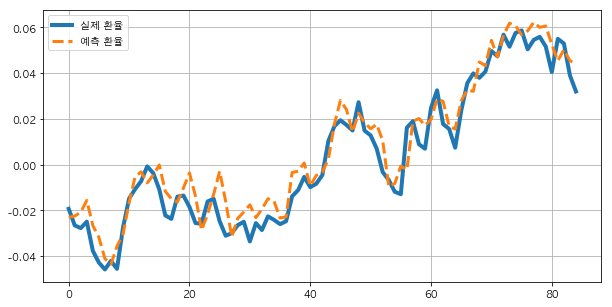

In [17]:
LSTM(taiwan, 40, 10, 30, 0.7)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
print ('r^2: ', r2_score(y_test, pred))
print ('MSE: ', mean_squared_error(y_test, pred))
print ('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))

NameError: name 'y_test' is not defined

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________
Train on 190 samples, validate on 82 samples
Epoch 1/50
190/190 [==============================] - 5s 28ms/step - loss: 0.0011 - val_loss: 2.5066e-04
Epoch 2/50
190/190 [==============================] - 2s 13ms/step - loss: 5.5364e-04 - val_loss: 1.8673e-04
Epoch 3/50
190/190 [==============================] - 2s 13ms/step - loss: 4.1097e-04 - val_loss: 1.7541e-04
Epoch 4/50
190/190 [==============

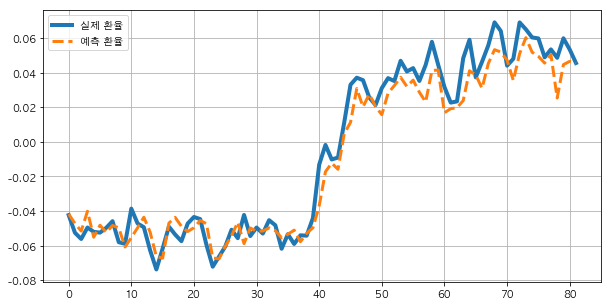

In [21]:
LSTM(hongkong, 50, 10, 50, 0.7)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20, 20)            1760      
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                21760     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
Train on 211 samples, validate on 91 samples
Epoch 1/30
211/211 [==============================] - 3s 16ms/step - loss: 9.0501e-04 - val_loss: 8.1561e-04
Epoch 2/30
211/211 [==============================] - 1s 5ms/step - loss: 4.4617e-04 - val_loss: 0.0011
Epoch 3/30
211/211 [==============================] - 1s 6ms/step - loss: 3.9048e-04 - val_loss: 1.7116e-04
Epoch 4/30
211/211 [================

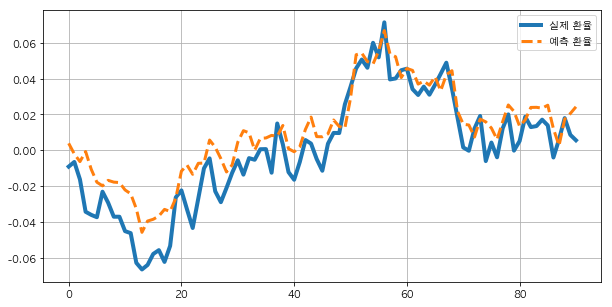

In [18]:
LSTM(hongkong, 20, 10, 30, 0.7)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 30, 30)            3840      
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                24320     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 28,225
Trainable params: 28,225
Non-trainable params: 0
_________________________________________________________________
Train on 204 samples, validate on 88 samples
Epoch 1/30
204/204 [==============================] - 4s 20ms/step - loss: 7.9408e-04 - val_loss: 4.1213e-04
Epoch 2/30
204/204 [==============================] - 2s 8ms/step - loss: 4.6867e-04 - val_loss: 4.9956e-04
Epoch 3/30
204/204 [==============================] - 2s 8ms/step - loss: 3.5777e-04 - val_loss: 3.7644e-04
Epoch 4/30
204/204 [============

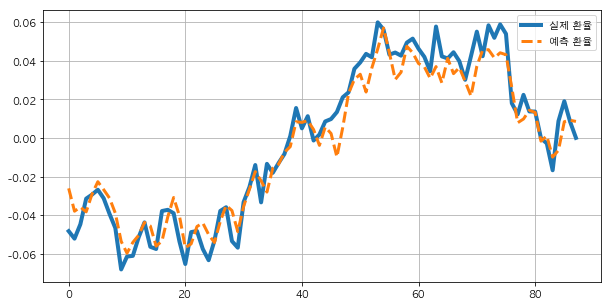

In [19]:
LSTM(hongkong, 30, 10, 30, 0.7)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 40, 40)            6720      
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                26880     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________
Train on 197 samples, validate on 85 samples
Epoch 1/30
197/197 [==============================] - 5s 24ms/step - loss: 7.2208e-04 - val_loss: 2.7051e-04
Epoch 2/30
197/197 [==============================] - 2s 10ms/step - loss: 4.1106e-04 - val_loss: 2.0396e-04
Epoch 3/30
197/197 [==============================] - 2s 10ms/step - loss: 3.8732e-04 - val_loss: 1.4668e-04
Epoch 4/30
197/197 [==========

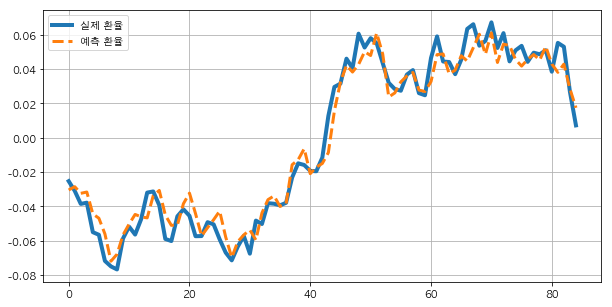

In [20]:
LSTM(hongkong, 40, 10, 30, 0.7) #최적

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 60, 60)            14880     
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                32000     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 46,945
Trainable params: 46,945
Non-trainable params: 0
_________________________________________________________________
Train on 183 samples, validate on 79 samples
Epoch 1/30
183/183 [==============================] - 6s 33ms/step - loss: 8.9316e-04 - val_loss: 3.8320e-04
Epoch 2/30
183/183 [==============================] - 3s 14ms/step - loss: 4.8392e-04 - val_loss: 1.7824e-04
Epoch 3/30
183/183 [==============================] - 3s 15ms/step - loss: 4.1875e-04 - val_loss: 1.8714e-04
Epoch 4/30
183/183 [==========

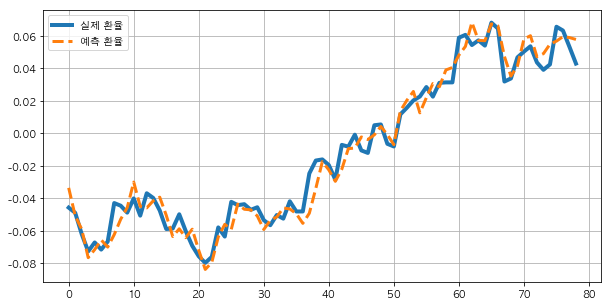

In [22]:
LSTM(hongkong, 60, 10, 30, 0.7)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 40, 40)            6720      
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                26880     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________
Train on 197 samples, validate on 85 samples
Epoch 1/50
197/197 [==============================] - 5s 26ms/step - loss: 8.9265e-04 - val_loss: 5.3613e-04
Epoch 2/50
197/197 [==============================] - 2s 10ms/step - loss: 4.5149e-04 - val_loss: 6.2581e-04
Epoch 3/50
197/197 [==============================] - 2s 9ms/step - loss: 4.1679e-04 - val_loss: 3.9098e-04
Epoch 4/50
197/197 [===========

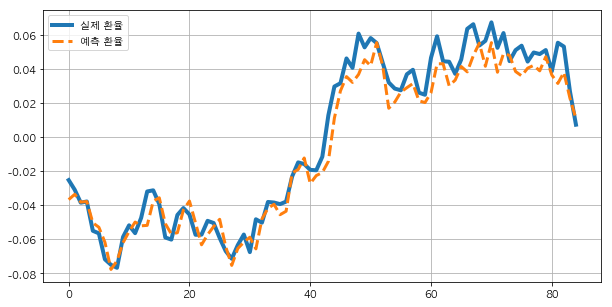

In [23]:
LSTM(hongkong, 40, 10, 50, 0.7)

In [29]:
save_img = '홍콩.png'
plt.savefig(save_img)

<Figure size 432x288 with 0 Axes>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 40, 40)            6720      
_________________________________________________________________
lstm_26 (LSTM)               (None, 64)                26880     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________
Train on 197 samples, validate on 85 samples
Epoch 1/30
197/197 [==============================] - 7s 33ms/step - loss: 0.0023 - val_loss: 3.7517e-04
Epoch 2/30
197/197 [==============================] - 2s 10ms/step - loss: 9.8609e-04 - val_loss: 5.4261e-04
Epoch 3/30
197/197 [==============================] - 2s 9ms/step - loss: 8.2273e-04 - val_loss: 2.3692e-04
Epoch 4/30
197/197 [===============

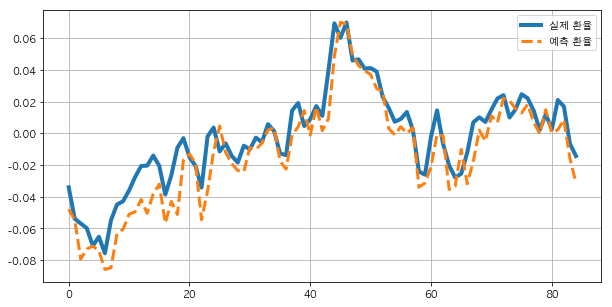

In [31]:
    import matplotlib.pyplot as plt
    from keras.models import Sequential #Sequential는 층을 순서대로 쌓아주는 클래스
    from keras.layers import LSTM, Dropout, Dense, Activation
    import datetime
    seq_len = 40
    sequence_length = seq_len + 1

    result = []
    for index in range(len(japan) - sequence_length):
        result.append(japan[index: index + sequence_length])
    #데이터 정규화
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalized_data.append(normalized_window)

    result = np.array(normalized_data)
    #학습데이터와 테스트테이터를 나줘줌
    row = int(round(result.shape[0] * 0.7))
    train = result[:row, :]
    np.random.shuffle(train)

    x_train = train[:, :-1]
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    y_train = train[:, -1]

    x_test = result[row:, :-1]
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    y_test = result[row:, -1]
    #모델 빌드
    model = Sequential()
    model.add(LSTM(40, return_sequences = True, input_shape = (40, 1))) #input를 맞쳐줘야된다
    model.add(LSTM(64, return_sequences = False))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = 'mse', optimizer = 'rmsprop')
    model.summary()
    #모델 핏팅
    model.fit(x_train, y_train,
        validation_data = (x_test, y_test),
        batch_size = 10,
        epochs = 30)
    
    pred = model.predict(x_test)
    fig = plt.figure(facecolor = 'white', figsize = (10, 5))
    ax = fig.add_subplot(111)
    ax.plot(y_test, label = '실제 환율', linewidth = 4)
    ax.plot(pred, label = '예측 환율', linewidth = 3, linestyle = '--')
    plt.rcParams['axes.grid'] = True
    ax.legend()
    save_img = '일본.png'
    plt.savefig(save_img)
    plt.show()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 40)            6720      
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                26880     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 197 samples, validate on 85 samples
Epoch 1/30
197/197 [==============================] - 3s 17ms/step - loss: 5.6679e-04 - val_loss: 1.6426e-04
Epoch 2/30
197/197 [==============================] - 2s 9ms/step - loss: 2.4420e-04 - val_loss: 1.3763e-04
Epoch 3/30
197/197 [

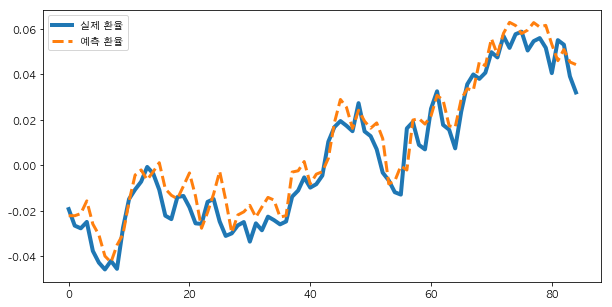

In [14]:
    import matplotlib.pyplot as plt
    from keras.models import Sequential #Sequential는 층을 순서대로 쌓아주는 클래스
    from keras.layers import LSTM, Dropout, Dense, Activation
    import datetime
    seq_len = 40
    sequence_length = seq_len + 1

    result = []
    for index in range(len(taiwan) - sequence_length):
        result.append(taiwan[index: index + sequence_length])
    #데이터 정규화
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalized_data.append(normalized_window)

    result = np.array(normalized_data)
    #학습데이터와 테스트테이터를 나줘줌
    row = int(round(result.shape[0] * 0.7))
    train = result[:row, :]
    np.random.shuffle(train)

    x_train = train[:, :-1]
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    y_train = train[:, -1]

    x_test = result[row:, :-1]
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    y_test = result[row:, -1]
    #모델 빌드
    model = Sequential()
    model.add(LSTM(40, return_sequences = True, input_shape = (40, 1))) #input를 맞쳐줘야된다
    model.add(LSTM(64, return_sequences = False))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = 'mse', optimizer = 'rmsprop')
    model.summary()
    #모델 핏팅
    model.fit(x_train, y_train,
        validation_data = (x_test, y_test),
        batch_size = 10,
        epochs = 30)
    
    pred = model.predict(x_test)
    fig = plt.figure(facecolor = 'white', figsize = (10, 5))
    ax = fig.add_subplot(111)
    ax.plot(y_test, label = '실제 환율', linewidth = 4)
    ax.plot(pred, label = '예측 환율', linewidth = 3, linestyle = '--')
    plt.rcParams['axes.grid'] = True
    ax.legend()
    save_img = '대만.png'
    plt.savefig(save_img)
    plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
print ('r^2: ', r2_score(y_test, pred))
print ('MSE: ', mean_squared_error(y_test, pred))
print ('RMSE: ', np.sqrt(mean_squared_error(y_test, pred))) #매우 낮은 값으로 정밀도가 높은 모델이라고 볼 수 있다.
# 다른모델을 돌려봐야됨.

r^2:  0.9248593839782903
MSE:  6.726711026158876e-05
RMSE:  0.008201652898141249


In [25]:
def MASE(y_train, y_test, pred):
    n = y_test.shape[0]
    d = np.abs(  np.diff(y_train) ).sum()/(n-1)
    
    errors = np.abs(y_test - pred )
    return errors.mean()/d